In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df0=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset0_smoothed.csv', sep=',',  index_col=0)
df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset1_smoothed.csv', sep=',',  index_col=0)
df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset2_smoothed.csv', sep=',',  index_col=0)
df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO 2\Compiled_Data\dataset3_smoothed.csv', sep=',',  index_col=0)

dataset_df = pd.concat([df0, df1, df2, df3])

In [3]:
total_features_df = dataset_df.drop(['File_No', 'Cast_date', 'dayOfWeek', 'Die', 'cav1_defect','cav2_defect', 'defect'], axis=1)
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en12,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,defect_smoothed
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.311415,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0.0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.312217,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0.0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.312139,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0.0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.322637,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0.0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.317911,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0.0


In [4]:
features_df = total_features_df.drop(['defect_smoothed'], axis=1)
features_df = pd.get_dummies(features_df)
labels_df = dataset_df.loc[:, ['defect_smoothed']]
total_features_df.head()

,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,tiebar_en12,tiebar_en13,tiebar_en14,tiebar_en15,tiebar_mse,tiebar_mae,Part,Shift,Shot_no,defect_smoothed
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,-0.311415,-0.483169,-0.611454,-0.387602,0.002732,0.035002,B1012-278-1,1,5,0.0
1,22.802261,1.165540,-0.969839,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,-0.312217,-0.477430,-0.606745,-0.379443,0.002792,0.035812,B1012-278-1,1,6,0.0
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,-0.312139,-0.474928,-0.604088,-0.373460,0.002860,0.037235,B1012-278-1,1,7,0.0
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,-0.322637,-0.462039,-0.586925,-0.352818,0.002696,0.037237,B1012-278-1,1,8,0.0
4,24.256344,2.081036,-0.970541,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,-0.317911,-0.443705,-0.595761,-0.323802,0.002910,0.039074,B1012-278-1,1,9,0.0


In [5]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(107569, 283)


C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Total variance explained: 0.8525707950708357


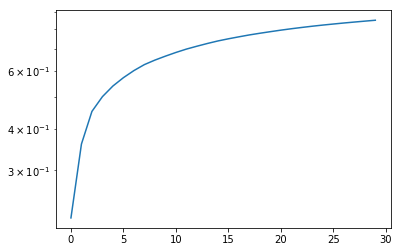

In [6]:
pca = PCA(n_components=30)
trans_features = pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())

In [7]:
target = labels_df.defect_smoothed.values
print(target.shape)
print(trans_features.shape)

(107569,)
(107569, 30)


(107569, 30)

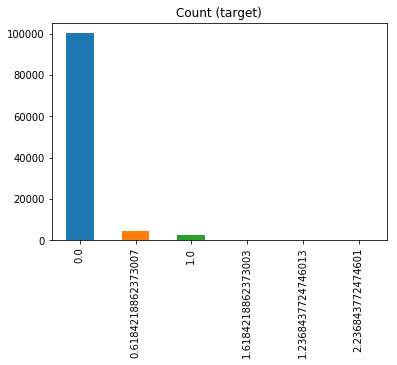

In [8]:
total_features_df.defect_smoothed.value_counts().plot(kind='bar', title='Count (target)');
trans_features.shape

In [ ]:
#Apply undersampling
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour
rus = RandomUnderSampler(random_state=10)
X_res, y_res = rus.fit_resample(trans_features,target)
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
print(X_res.shape)

In [23]:
trans_features.shape

(107569, 30)

In [39]:
from scipy import signal
downsamples = 10000

X_res = signal.resample(trans_features, downsamples, axis=0)
y_res = signal.resample(target, downsamples, axis=0)

In [40]:
from collections import Counter
Counter(y_res).keys() # equals to list(set(words))
#Counter(y_res).values() 

dict_keys([-0.11418681643029747, 0.2706171602457719, 0.16435894720462046, 0.5399544575785077, 0.4342656389039481, -0.030390992005806482, 0.29699293257441567, 0.027843416819485493, 0.0736110538378453, -0.11820546075256817, 0.5785708938818184, 0.1673960781615281, 0.17737782384149606, 0.40210053459822215, 0.4035790074210399, 0.019019146686315856, -0.022999811010654212, 0.029687169418326897, -0.04458853680483757, 0.12059410005848546, 0.19071997106999664, 0.18094741009304527, -0.1231742007125738, 0.5001282172558585, 0.25746115937882497, -0.09319190142505987, 0.057151610692723266, -0.04075452581971622, 0.030934019862471157, -0.023937734617993308, 0.018166955186103742, -0.012621610596947516, 0.006231125866682475, 0.0031055849422581576, -0.022765954183839608, 0.13185995297757144, 0.12916208796221512, -0.058125043167251686, 0.042022639445269495, -0.03470328156425587, 0.030474639650047108, -0.02773123585913796, 0.025847145084431037, -0.02453201693748316, 0.023637091849459595, -0.0230791489956601

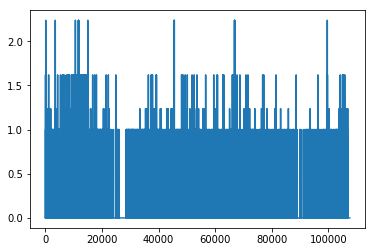

In [41]:
#plt.plot(y_res)
plt.plot(target)

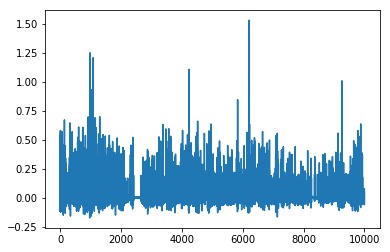

In [42]:
plt.plot(y_res)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=42)

In [44]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()

In [45]:
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=0)

In [46]:
y_pred, sigma = gpr.predict(X_test, return_std=True)
y_pred_nr=(y_pred>0.5)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nr)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [51]:
y_pred_nr.shape

(4000,)

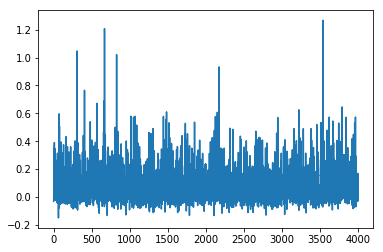

In [53]:
plt.plot(y_test)

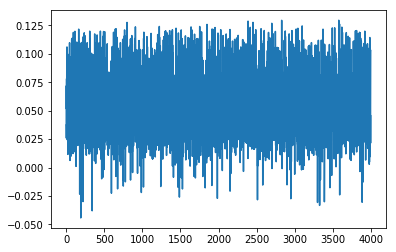

In [61]:
plt.plot(y_pred)

In [63]:
y_pred.max()

0.12959806088838377